In [52]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn import preprocessing


In [53]:
# Reading the csv file
data = pd.read_csv("cardata.csv")


In [54]:
# Making the dataframe

df = pd.DataFrame(data)
df


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [55]:
# Removing the car name feature

df.drop("Car_Name", axis=1, inplace=True)
df


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [56]:
# Numerical features description

df.describe()


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [57]:
# String based features description

df[['Fuel_Type',
    'Seller_Type',
    'Transmission', ]].describe()


,Fuel_Type,Seller_Type,Transmission
count,301,301,301
unique,3,2,2
top,Petrol,Dealer,Manual
freq,239,195,261


In [58]:
df


,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [59]:
# Reordering the columns
df = df[['Year',
         'Present_Price',
         'Kms_Driven',
         'Fuel_Type',
         'Seller_Type',
         'Transmission',
         'Owner',
         'Selling_Price']]
df


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,6.87,42450,Diesel,Dealer,Manual,0,4.60
...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,Diesel,Dealer,Manual,0,9.50
297,2015,5.90,60000,Petrol,Dealer,Manual,0,4.00
298,2009,11.00,87934,Petrol,Dealer,Manual,0,3.35
299,2017,12.50,9000,Diesel,Dealer,Manual,0,11.50


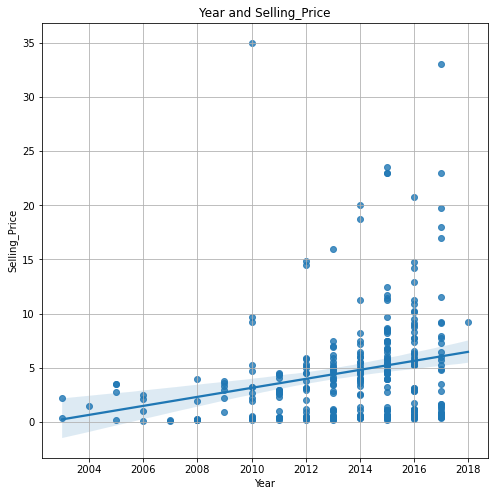

In [60]:
#Year and target

figure = plt.figure(figsize=(8, 8))
x = df.Year
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


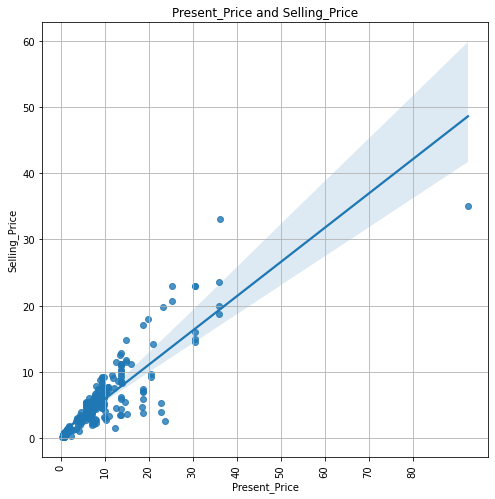

In [61]:
# Present price and target

figure = plt.figure(figsize=(8, 8))
x = df.Present_Price
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.xticks(range(0, 90, 10), rotation=90)
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


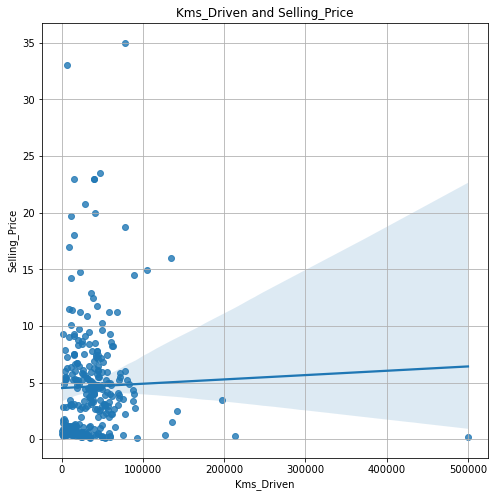

In [62]:
# Kms driven and target

figure = plt.figure(figsize=(8, 8))
x = df.Kms_Driven
y = df.Selling_Price
sns.regplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


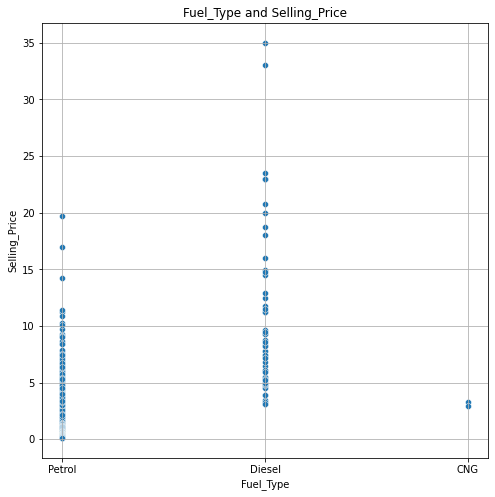

In [63]:
# Fuel Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Fuel_Type
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


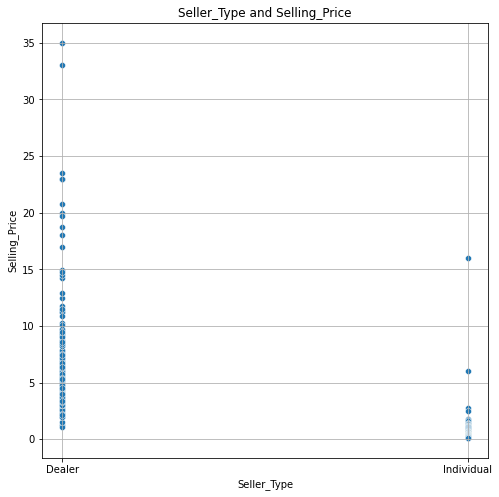

In [64]:
# Seller Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Seller_Type
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


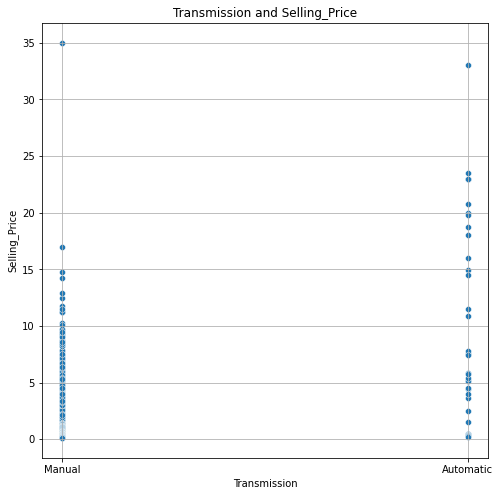

In [65]:
# Transmission Type and target

figure = plt.figure(figsize=(8, 8))
x = df.Transmission
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


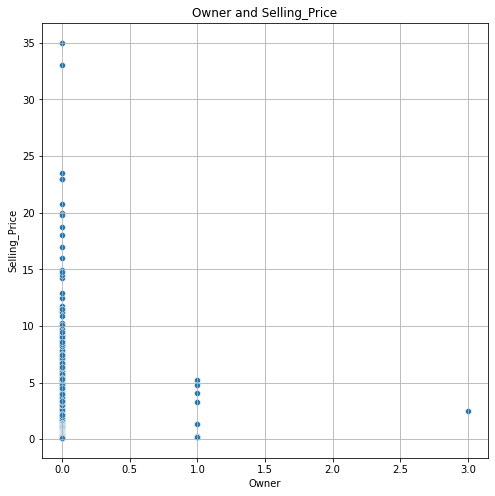

In [66]:
#Owner and target

figure = plt.figure(figsize=(8, 8))
x = df.Owner
y = df.Selling_Price
sns.scatterplot(x=x, y=y)
plt.title(str(x.name)+" and "+str(y.name))
plt.grid()
plt.savefig(str(x.name)+" "+str(y.name) + ".jpg")


# clearing Noises


In [67]:
# Selling price noise checking

df1 = df.copy()
print("Mean Value : ", df1.Selling_Price.mean())
df1.Selling_Price.nlargest(4)


Mean Value :  4.661295681063127


86    35.0
64    33.0
63    23.5
51    23.0
Name: Selling_Price, dtype: float64

In [68]:
df1.iloc[86]


Year               2010
Present_Price      92.6
Kms_Driven        78000
Fuel_Type        Diesel
Seller_Type      Dealer
Transmission     Manual
Owner                 0
Selling_Price      35.0
Name: 86, dtype: object

In [69]:
df1.iloc[64]


Year                  2017
Present_Price        36.23
Kms_Driven            6000
Fuel_Type           Diesel
Seller_Type         Dealer
Transmission     Automatic
Owner                    0
Selling_Price         33.0
Name: 64, dtype: object

#### No acceptable evidence were find to remove two above data


In [70]:
# Kms driven noise checking

df[df1.Kms_Driven > 400000]


,Year,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
196,2008,0.52,500000,Petrol,Individual,Automatic,0,0.17


#### No noise were found


# Preprocessing for modeling


In [71]:
# Current year

now = df1.Year.max() + 1
now


2019

In [72]:
# Calculating the age

def Age(year):
    return now - year


age = df1.Year.apply(Age)
AGE = pd.DataFrame(columns=["Age"])
AGE.Age = age
df1.insert(1, "Age", AGE)
df1.head()


,Year,Age,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Selling_Price
0,2014,5,5.59,27000,Petrol,Dealer,Manual,0,3.35
1,2013,6,9.54,43000,Diesel,Dealer,Manual,0,4.75
2,2017,2,9.85,6900,Petrol,Dealer,Manual,0,7.25
3,2011,8,4.15,5200,Petrol,Dealer,Manual,0,2.85
4,2014,5,6.87,42450,Diesel,Dealer,Manual,0,4.60


In [73]:
# Converting string features to numbers
'''
Fuel Type : CNG = 1,Diesel = 2,Petrol = 3
Seller Type : Dealer = 1,Individual = 2
Transmission : Automatic = 1,Manual = 2

'''


def fuel_convert(fuel):
    if fuel == "CNG":
        return 1
    elif fuel == "Diesel":
        return 2
    elif fuel == "Petrol":
        return 3


def seller_convert(seller):
    if seller == "Dealer":
        return 1
    elif seller == "Individual":
        return 2


def transmission_convert(transmission):
    if transmission == "Automatic":
        return 1
    elif transmission == "Manual":
        return 2


df1.Fuel_Type = df1.Fuel_Type.apply(fuel_convert)
df1.Seller_Type = df1.Seller_Type.apply(seller_convert)
df1.Transmission = df1.Transmission.apply(transmission_convert)


In [74]:
#removing nan values 
DF = df1.dropna()
df = DF


In [75]:
#normalizing the input values

Scaler = preprocessing.MinMaxScaler(feature_range=(1, 1000))
norm1 = Scaler.fit_transform(DF)
norm1_df = pd.DataFrame(norm1, columns=DF.columns.tolist())
DF = norm1_df


In [76]:
#creating x and y for training

x = pd.DataFrame(DF, columns=[
    'Age',
    'Present_Price',
    'Kms_Driven',
    'Fuel_Type',
    'Seller_Type',
    'Transmission',
    'Owner'])
y = DF.Selling_Price


In [77]:
#creating regression model

x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.2, random_state=42)
regressor = LinearRegression()
regressor.fit(x_train, y_train)
y_pred = regressor.predict(x_test)


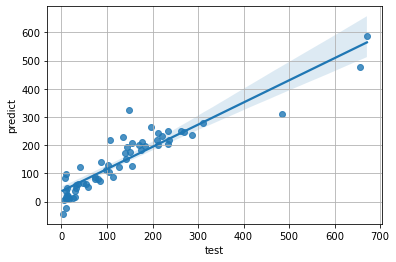

In [78]:
#predicted values and true values correlation plot

sns.regplot(x=y_test, y=y_pred)
plt.xlabel("test")
plt.ylabel("predict")
plt.grid()

In [79]:
#creating test and prediction dataframe

test = x_test.copy()
test.insert(7, "y_pred", y_pred)
test.insert(8, "y_test", y_test)


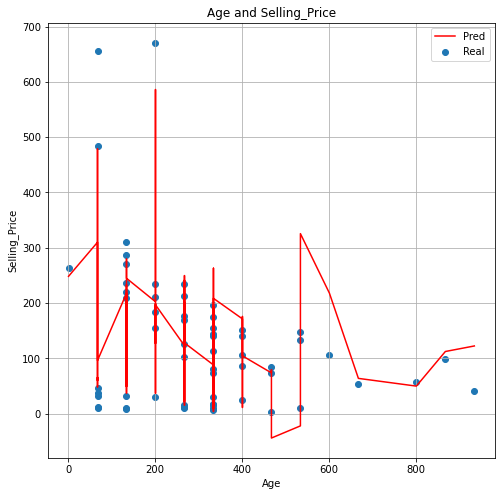

In [80]:
#Age and selling_price plot

feature = "Age"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


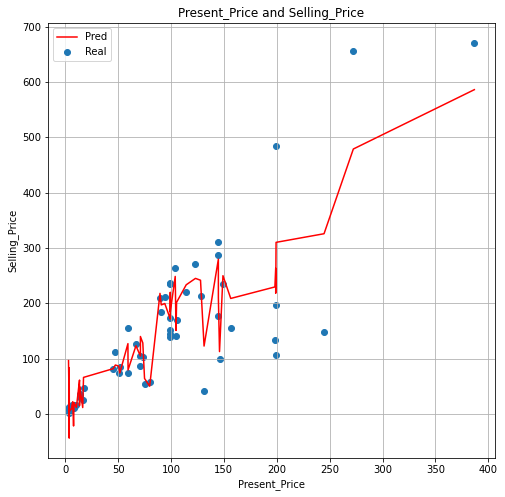

In [81]:
#present price and selling price plot

feature = "Present_Price"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


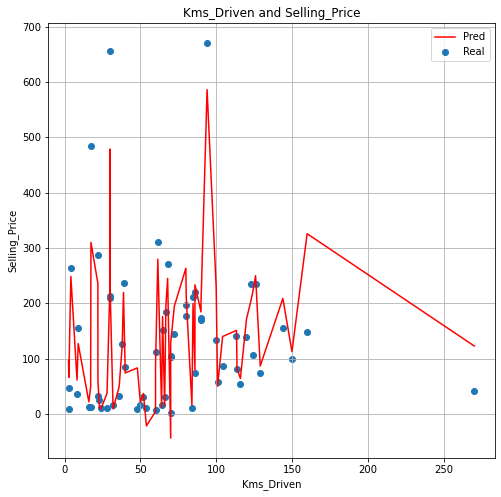

In [82]:
#kms driven and selling price

feature = "Kms_Driven"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


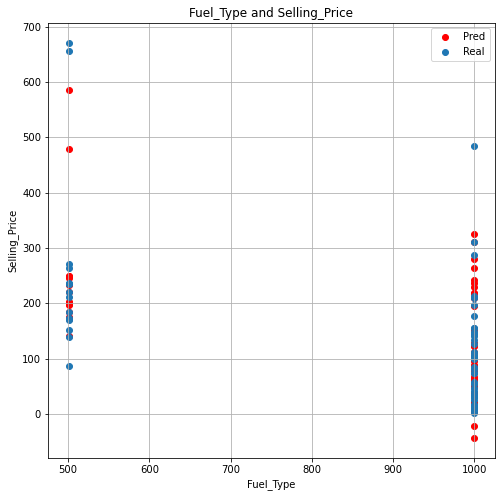

In [83]:
#fuel type and selling price

feature = "Fuel_Type"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.scatter(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


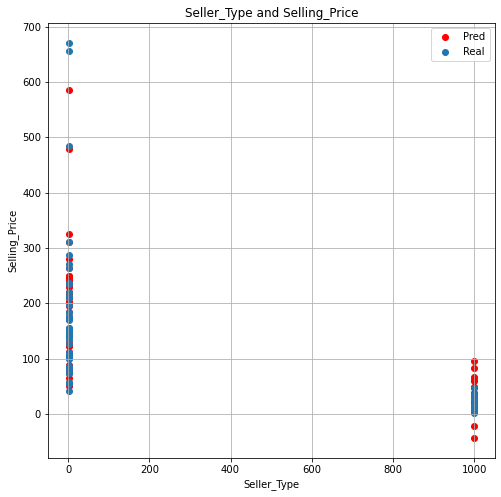

In [84]:
#seller type and selling price plot

feature = "Seller_Type"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.scatter(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


In [85]:
#evaluation

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error :  34.97248666725043
Mean Squared Error :  2891.497547893803
Root Mean Squared Error :  53.77264683734476
R2 Score :  0.8468053957657422


In [86]:
#finding the best order of equations

columns = DF.columns.tolist()
columns.remove("Year")
columns.remove("Selling_Price")
dftest = DF.copy()
for i in range(2,12):
    print("==============================================")
    print("Order = "+str(i))
    for c in columns :
        tmp = dftest[c]**i
        dftest.insert((len(dftest.columns)-2),(c+str(i)),tmp)
    Scaler = preprocessing.MinMaxScaler(feature_range=(1,1000))
    norm1 = Scaler.fit_transform(dftest)
    norm1_df = pd.DataFrame(norm1,columns=dftest.columns.tolist())
    dftest = norm1_df
    traincolumns = dftest.columns.tolist()
    traincolumns.remove("Year")
    traincolumns.remove("Selling_Price")
    x=dftest[traincolumns]
    y = dftest.Selling_Price
    x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.20, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error : ", np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score : ", metrics.r2_score(y_test, y_pred))
    
    

Order = 2
Mean Absolute Error :  30.9818780585506
Mean Squared Error :  1518.3196110902636
Root Mean Squared Error :  38.96562088675431
R2 Score :  0.9266918808384212
Order = 3
Mean Absolute Error :  31.117049030015647
Mean Squared Error :  1639.4905921588177
Root Mean Squared Error :  40.49062350913873
R2 Score :  0.920841454713239
Order = 4
Mean Absolute Error :  31.893207090240644
Mean Squared Error :  2237.542668637337
Root Mean Squared Error :  47.30267084042229
R2 Score :  0.8919660634141467
Order = 5
Mean Absolute Error :  31.810593391503765
Mean Squared Error :  2228.5353452146437
Root Mean Squared Error :  47.207365370402144
R2 Score :  0.8924009586325017
Order = 6
Mean Absolute Error :  31.217584000710367
Mean Squared Error :  2130.141289185768
Root Mean Squared Error :  46.153453708100415
R2 Score :  0.8971516600865759
Order = 7
Mean Absolute Error :  32.58299875740777
Mean Squared Error :  2277.574036731111
Root Mean Squared Error :  47.72393567939584
R2 Score :  0.89003325

In [87]:
#improving the accuracy of the equation

columns = DF.columns.tolist()
columns.remove("Year")
columns.remove("Selling_Price")
dftest = DF.copy()
for i in range(2, 3):
    print("==============================================")
    print("Order = "+str(i))
    for c in columns:
        tmp = dftest[c]**i
        dftest.insert((len(dftest.columns)-2), (c+str(i)), tmp)
    dftest.insert((len(dftest.columns)-2), "sin(Kms_Driven)",
                  np.sin((2*np.pi*dftest.Kms_Driven)/290))
    Scaler = preprocessing.MinMaxScaler(feature_range=(1, 1000))
    norm1 = Scaler.fit_transform(dftest)
    norm1_df = pd.DataFrame(norm1, columns=dftest.columns.tolist())
    dftest = norm1_df
    traincolumns = dftest.columns.tolist()
    traincolumns.remove("Year")
    traincolumns.remove("Selling_Price")
    x = dftest[traincolumns]
    y = dftest.Selling_Price
    x_train, x_test, y_train, y_test = train_test_split(
        x, y, test_size=0.20, random_state=0)
    regressor = LinearRegression()
    regressor.fit(x_train, y_train)
    y_pred = regressor.predict(x_test)
    print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
    print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
    print("Root Mean Squared Error : ", np.sqrt(
        metrics.mean_squared_error(y_test, y_pred)))
    print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Order = 2
Mean Absolute Error :  28.969480974390706
Mean Squared Error :  1375.6449351465853
Root Mean Squared Error :  37.089687719723194
R2 Score :  0.9335805570229488


In [88]:
#converting negative values to positive in order to improve the accuracy

y_pred = pd.DataFrame(y_pred, columns=["val"])


def positive(number):
    if number < 0:
        return 0
    return number


y_pred = y_pred.val.apply(positive)
y_pred = y_pred.tolist()


In [89]:
#evaluation

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error :  25.79899697760473
Mean Squared Error :  1135.1644149978733
Root Mean Squared Error :  33.69220110051989
R2 Score :  0.9451915343812939


In [90]:
#cross validation checking

kfold_validation = KFold(10)
result = cross_val_score(regressor, x, y, cv=kfold_validation)
print(result)
print(np.mean(result))


[ 7.17968899e-01  9.01797012e-01  6.81712696e-01  8.87701056e-01
 -4.65467686e+01 -1.10815473e+03 -2.28408361e+00  8.07060538e-01
  8.86603655e-01  9.03824843e-01]
-115.11989140918027


In [91]:
#remove a fold to check if the accuracy improves or not but failed!!!



# DF = pd.concat([DF.loc[0:150],DF.loc[181:]])
# DF.reset_index(inplace=True)


In [92]:
#remove a fold to check if the accuracy improves or not but failed!!!


# columns = DF.columns.tolist()
# columns.remove("Year")
# columns.remove("Selling_Price")
# dftest = DF.copy()
# for i in range(2,3):
#     print("==============================================")
#     print("Order = "+str(i))
#     for c in columns :
#         tmp = dftest[c]**i
#         dftest.insert((len(dftest.columns)-2),(c+str(i)),tmp)
#     dftest.insert((len(dftest.columns)-2),"sin(Kms_Driven)",np.sin((2*np.pi*dftest.Kms_Driven)/290))
#     Scaler = preprocessing.MinMaxScaler(feature_range=(1,1000))
#     norm1 = Scaler.fit_transform(dftest)
#     norm1_df = pd.DataFrame(norm1,columns=dftest.columns.tolist())
#     dftest = norm1_df
#     traincolumns = dftest.columns.tolist()
#     traincolumns.remove("Year")
#     traincolumns.remove("Selling_Price")
#     x=dftest[traincolumns]
#     y = dftest.Selling_Price
#     x_train, x_test, y_train, y_test = train_test_split(
#     x, y, test_size=0.25, random_state=1150)
#     regressor = LinearRegression()
#     regressor.fit(x_train, y_train)
#     y_pred = regressor.predict(x_test)
#     print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
#     print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
#     print("Root Mean Squared Error : ", np.sqrt(
#         metrics.mean_squared_error(y_test, y_pred)))
#     print("R2 Score : ", metrics.r2_score(y_test, y_pred))
# y_pred = pd.DataFrame(y_pred, columns=["val"])


# def positive(number):
#     if number < 0:
#         return 0
#     return number


# y_pred = y_pred.val.apply(positive)
# y_pred = y_pred.tolist()
# print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
# print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
# print("Root Mean Squared Error : ", np.sqrt(
#     metrics.mean_squared_error(y_test, y_pred)))
# print("R2 Score : ", metrics.r2_score(y_test, y_pred))


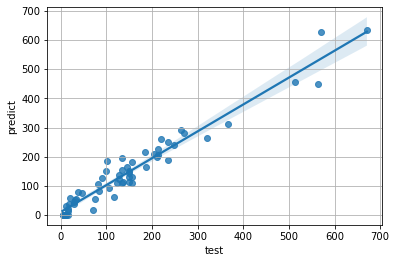

In [93]:
#predicted values and true values correlation plot

sns.regplot(x=y_test, y=y_pred)
plt.xlabel("test")
plt.ylabel("predict")
plt.grid()


In [94]:
#creating the test and predicted values dataframe

test = x_test.copy()
test.insert(7, "y_pred", y_pred)
test.insert(8, "y_test", y_test)


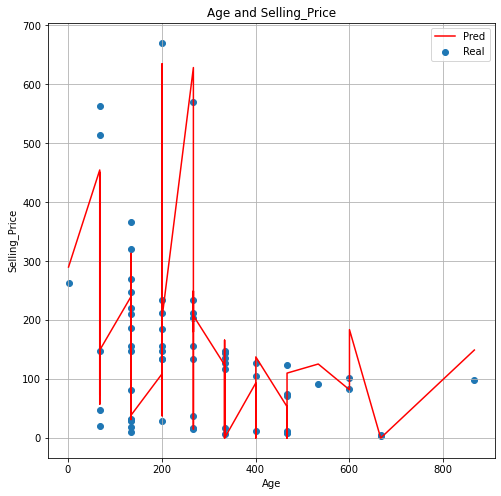

In [95]:
#ploting the Age and selling price plot

feature = "Age"
test.sort_values(by=[feature], inplace=True)
figure = plt.figure(figsize=(8, 8))
a = test[feature]
b = test.y_pred
c = test[feature]
d = test.y_test
plt.plot(a, b, color="red")
plt.scatter(c, d)
plt.legend(["Pred", "Real"])
plt.xlabel(feature)
plt.ylabel("Selling_Price")
plt.title(feature + " and "+"Selling_Price")
plt.grid()


In [96]:
# modeling with all data


columns = DF.columns.tolist()
columns.remove("Year")
columns.remove("Selling_Price")
dftest = DF.copy()
for i in range(2, 3):
    print("==============================================")
    print("Order = "+str(i))
    for c in columns:
        tmp = dftest[c]**i
        dftest.insert((len(dftest.columns)-2), (c+str(i)), tmp)
    dftest.insert((len(dftest.columns)-2), "sin(Kms_Driven)",
                  np.sin((2*np.pi*dftest.Kms_Driven)/290))
    traincolumns = dftest.columns.tolist()
    traincolumns.remove("Year")
    traincolumns.remove("Selling_Price")
    x = dftest[traincolumns]
    y = dftest.Selling_Price
    regressor = LinearRegression()
    regressor.fit(x, y)
print(regressor.coef_)


Order = 2
[-3.21666286e-01  1.70435294e+00 -4.59311976e-01  2.21262979e-01
 -6.37387666e-10 -2.00638514e-08  2.52059633e-04 -6.22514383e-04
  4.74288887e-04 -2.12862150e-04 -6.36717076e-07 -2.00838556e-05
 -3.68120225e-04  3.26818517e+01  1.53105897e-01]


In [97]:
#de normalisation

Scaler = preprocessing.MinMaxScaler(feature_range=(1, 1000))
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
norm1 = Scaler.fit_transform(y_pred)
y_pred = np.array(y_pred)
y_pred = y_pred.reshape(-1, 1)
y_pred = Scaler.inverse_transform(y_pred)


In [98]:
#converting the test 

y_test = np.array(y_test)
y_test = y_test.reshape(-1, 1)
y_test = Scaler.inverse_transform(y_test)


In [99]:
#evaluation after de normalization

print("Mean Absolute Error : ", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Squared Error : ", metrics.mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error : ", np.sqrt(
    metrics.mean_squared_error(y_test, y_pred)))
print("R2 Score : ", metrics.r2_score(y_test, y_pred))


Mean Absolute Error :  16.402743889584613
Mean Squared Error :  458.86626783798494
Root Mean Squared Error :  21.42116401687791
R2 Score :  0.9451915343812939


In [100]:
#creating the test and predicted values dataframe

pd5 = pd.DataFrame(y_test, columns=["Real"])
pd5.insert(1, "predict", y_pred)


In [101]:
#dataframe

pd5.head(20)


,Real,predict
0,148.323974,120.106504
1,7.279704,-0.635790
2,93.726192,71.623881
3,171.073050,178.367916
4,325.766765,288.541237
5,98.276007,82.566614
6,66.427301,58.841677
7,6.369741,19.338609
8,80.076747,78.200563
9,80.076747,86.876450


In [102]:
#The final step : geting data from user and normalize it and after that predicting the value and after that de normalizing the answer


year = int(input("Enter the car car build year : "))
age = 2019 - year
present_price = float(input("Enter the present_price : "))
kms_driven = int(input("Enter the Kms_driven : "))
fuel_type = int(
    input("Enter the fuel_type (Fuel Type : CNG = 1,Diesel = 2,Petrol = 3 ) : "))
seller_type = int(
    input("Enter the seller_type ( Seller Type : Dealer = 1,Individual = 2 ) : "))
transmission = int(
    input("Enter the transmission ( Transmission : Automatic = 1,Manual = 2 ) : "))
owner = int(input("Enter owner : "))

inputs = pd.DataFrame(columns=['Year',
                               'Age',
                               'Present_Price',
                               'Kms_Driven',
                               'Fuel_Type',
                               'Seller_Type',
                               'Transmission',
                               'Owner'])
inputs.loc[0] = [year, age, present_price, kms_driven,
                 fuel_type, seller_type, transmission, owner]
inputs.loc[1] = [df.Year.max(), df.Age.max(), df.Present_Price.max(), df.Kms_Driven.max(
), df.Fuel_Type.max(), df.Seller_Type.max(), df.Transmission.max(), df.Owner.max()]
inputs.loc[2] = [df.Year.min(), df.Age.min(), df.Present_Price.min(), df.Kms_Driven.min(
), df.Fuel_Type.min(), df.Seller_Type.min(), df.Transmission.min(), df.Owner.min()]
Scaler = preprocessing.MinMaxScaler(feature_range=(1, 1000))
norm = Scaler.fit_transform(inputs)
norminput = pd.DataFrame(norm, columns=['Year',
                                        'Age',
                                        'Present_Price',
                                        'Kms_Driven',
                                        'Fuel_Type',
                                        'Seller_Type',
                                        'Transmission',
                                        'Owner'])
inp = norminput.iloc[0].tolist()
weight = regressor.coef_
selling_price = regressor.intercept_ + (weight[0]*inp[1]) + (weight[1]*inp[2])+(weight[2]*inp[3])+(weight[3]*inp[4])+(weight[4]*inp[5])+(weight[5]*inp[6])+(weight[6]*(inp[1]**2)) + \
    (weight[7]*(inp[2]**2))+(weight[8]*(inp[3]**2))+(weight[9]*(inp[4]**2))+(weight[10]*(inp[5]**2)) + \
    (weight[11]*(inp[6]**2)) + (weight[12]*(inp[7]**2)) + \
    (weight[13]*np.sin(inp[3])+(weight[14]*inp[7]))
if selling_price < 0:
    selling_price = 0

Scaler = preprocessing.MinMaxScaler(feature_range=(
    df.Selling_Price.min(), df.Selling_Price.max()))
renormal = np.array(
    [DF.Selling_Price.min(), selling_price, DF.Selling_Price.max()])
renormal = renormal.reshape(-1, 1)
answer = Scaler.fit_transform(renormal)
print("The selling_price is estimated : ", answer[1])



Enter the car car build year : 10
Enter the present_price : 11.23
Enter the Kms_driven : 42000
Enter the fuel_type (Fuel Type : CNG = 1,Diesel = 2,Petrol = 3 ) : 3
Enter the seller_type ( Seller Type : Dealer = 1,Individual = 2 ) : 1
Enter the transmission ( Transmission : Automatic = 1,Manual = 2 ) : 2
Enter owner : 1
The selling_price is estimated :  [6.62282773]
